# Fase 1: Importaci√≥n de librer√≠as necesarias

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ------------------------------
# M√ìDULOS PARA MANIPULACI√ìN Y VISUALIZACI√ìN DE DATOS
# ------------------------------
import numpy as np  # Operaciones num√©ricas de alto rendimiento
import pandas as pd  # Manipulaci√≥n de datos estructurados (opcional si se usa DataFrame)
import matplotlib.pyplot as plt  # Visualizaci√≥n de m√©tricas y resultados
import seaborn as sns  # Visualizaciones m√°s atractivas
import re

# ------------------------------
# M√ìDULOS DE PREPROCESAMIENTO Y UTILIDADES DE KERAS
# ------------------------------
from tensorflow.keras.datasets import imdb  # Dataset IMDB preprocesado de Keras
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Padding para secuencias
from tensorflow.keras.preprocessing.text import Tokenizer  # (Si decides usar texto original en lugar de √≠ndices)
# ------------------------------
# M√ìDULOS PARA DEFINIR EL MODELO EN KERAS
# ------------------------------
from tensorflow.keras.models import Model  # API funcional para modelos complejos
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, LayerNormalization
from tensorflow.keras.layers import GlobalAveragePooling1D, Add, Embedding
# ------------------------------
# M√ìDULOS DE LA ARQUITECTURA TRANSFORMER (capas de atenci√≥n y m√°s)
# ------------------------------
from tensorflow.keras.layers import MultiHeadAttention  # Mecanismo de atenci√≥n multiparte
from tensorflow.keras.optimizers import Adam  # Optimizador popular en NLP
from tensorflow.keras.losses import BinaryCrossentropy  # P√©rdida para clasificaci√≥n binaria
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard, Callback
# ------------------------------
# M√ìDULOS PARA M√âTRICAS Y AN√ÅLISIS
# ------------------------------
from sklearn.metrics import classification_report, confusion_matrix  # M√©tricas de rendimiento
from sklearn.model_selection import train_test_split
# ------------------------------
# UTILIDADES ADICIONALES
# ------------------------------
import tensorflow as tf  # Librer√≠a base para modelos de deep learning
import os  # Para gestionar rutas de guardado de modelos/logs

# Fase 2: Exploraci√≥n del Dataset IMDB

In [ ]:
# Cargamos el dataset IMDB desde Keras.
# Este dataset ya viene tokenizado: las palabras han sido reemplazadas por √≠ndices enteros.
# num_words=10000 indica que se conservar√°n las 10,000 palabras m√°s frecuentes.
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

17464789/17464789 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 0us/step


In [ ]:
# Revisamos la cantidad de muestras en entrenamiento y prueba
print("Tama√±o del set de entrenamiento:", len(X_train))
print("Tama√±o del set de prueba:", len(X_test))

Tama√±o del set de entrenamiento: 25000
Tama√±o del set de prueba: 25000


In [ ]:
# Mostramos una rese√±a en su forma tokenizada (√≠ndices de palabras)
print("Ejemplo de rese√±a (tokenizada):", X_train[0])

# Mostramos la etiqueta asociada (0 = negativa, 1 = positiva)
print("Etiqueta de la rese√±a:", y_train[0])

Ejemplo de rese√±a (tokenizada): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Etiqueta de la rese√±a: 1


In [ ]:
# Calculamos la longitud de cada rese√±a
review_lengths = [len(review) for review in X_train]

# Estad√≠sticas descriptivas sobre la longitud de las rese√±as
print("Longitud m√≠nima:", np.min(review_lengths))
print("Longitud m√°xima:", np.max(review_lengths))
print("Longitud promedio:", np.mean(review_lengths))

Longitud m√≠nima: 11
Longitud m√°xima: 2494
Longitud promedio: 238.71364


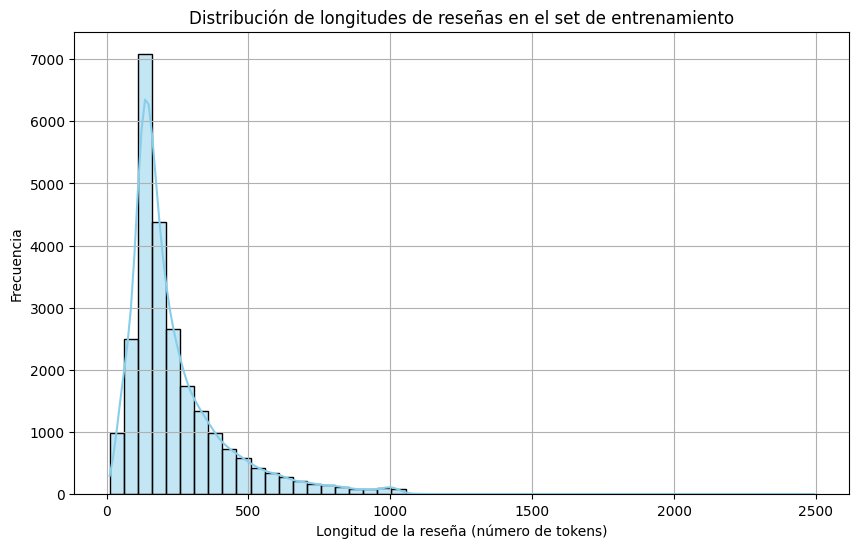

In [ ]:
# Visualizamos la distribuci√≥n de las longitudes para decidir un valor razonable de padding
plt.figure(figsize=(10, 6))
sns.histplot(review_lengths, bins=50, kde=True, color='skyblue')
plt.title("Distribuci√≥n de longitudes de rese√±as en el set de entrenamiento")
plt.xlabel("Longitud de la rese√±a (n√∫mero de tokens)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

In [ ]:
# Obtenemos el diccionario que mapea palabras a √≠ndices
word_index = imdb.get_word_index()

# Revertimos el diccionario: de √≠ndice a palabra
index_to_word = {index + 3: word for word, index in word_index.items()}
index_to_word[0] = "[PAD]"
index_to_word[1] = "[START]"
index_to_word[2] = "[UNK]"
index_to_word[3] = "[UNUSED]"

# Funci√≥n para decodificar una rese√±a
def decode_review(encoded_review):
    return ' '.join([index_to_word.get(i, "?") for i in encoded_review])

# Visualizamos la rese√±a decodificada
print("Rese√±a decodificada:\n", decode_review(X_train[0]))

1641221/1641221 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 0us/step
Rese√±a decodificada:
 [START] this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert [UNK] is an amazing actor and now the same being director [UNK] father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for [UNK] and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also [UNK] to the two little boy's that played the [UNK] of norman and paul they were just brilliant children are often left out of the [UNK] list i think because the stars that play them all

# Fase 3: Preprocesamiento del Dataset IMDB

Paso 1: Definir la longitud m√°xima de las secuencias

In [ ]:
# Longitud m√°xima de las rese√±as para padding/truncamiento
MAX_LEN = 250  # Puedes ajustarlo si quieres probar con m√°s/menos contexto

Paso 2: Aplicar padding a las secuencias

In [ ]:
# Pad o trunca las rese√±as para que todas tengan la misma longitud
X_train_pad = pad_sequences(X_train, maxlen=MAX_LEN, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test, maxlen=MAX_LEN, padding='post', truncating='post')

# Verificamos que todas las rese√±as ahora tengan la misma longitud
print("Nueva forma de las rese√±as:", X_train_pad.shape)

Nueva forma de las rese√±as: (25000, 250)


Paso 3: Conversi√≥n de etiquetas a float32

In [ ]:
# Convertimos las etiquetas a float32 para compatibilidad con la funci√≥n de p√©rdida
y_train = np.array(y_train).astype("float32")
y_test = np.array(y_test).astype("float32")

Paso 4: Crear un conjunto de validaci√≥n

In [ ]:
# Separamos un peque√±o conjunto de validaci√≥n del set de entrenamiento
X_train_pad, X_val_pad, y_train, y_val = train_test_split(
    X_train_pad, y_train, test_size=0.15, random_state=42)

print("Train shape:", X_train_pad.shape)
print("Validation shape:", X_val_pad.shape)

Train shape: (21250, 250)
Validation shape: (3750, 250)


Paso 5: Revisar una rese√±a tras el padding

In [ ]:
# Mostrar la rese√±a decodificada despu√©s del padding
print("Rese√±a con padding:\n", decode_review(X_train_pad[0]))

Rese√±a con padding:
 [START] i love buying those cheap lousy dvd's from [UNK] video one day i happened to buy this one it's the perfect silly science fiction film of the 50's all [UNK] up [UNK] with [UNK] everything scantily clad girls and plenty of melodrama it's an enjoyable film to those who appreciate this kind of stuff and if you can [UNK] your [UNK] enough you can actually get [UNK] out not just by the psychotic head or by the beating of the thing in the closet but toward the end with the character of 'the perfect [UNK] it's so what's another word for [UNK] ing [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]

## 3.1 Validaci√≥n de los Datos Procesados

1. Verificar la distribuci√≥n de clases (positivas vs negativas)

Negativa: 10686 muestras
Positiva: 10564 muestras


/tmp/ipython-input-14-90149018.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette='viridis')


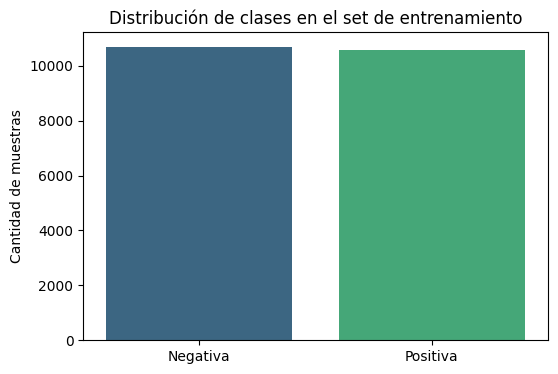

In [ ]:
# Conteo de clases en el set de entrenamiento
unique, counts = np.unique(y_train, return_counts=True)

# Mapeo a etiquetas legibles
labels = ['Negativa', 'Positiva']
for label, count in zip(labels, counts):
    print(f"{label}: {count} muestras")

# Visualizaci√≥n con gr√°fico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=counts, palette='viridis')
plt.title("Distribuci√≥n de clases en el set de entrenamiento")
plt.ylabel("Cantidad de muestras")
plt.show()

2. Confirmar que todas las secuencias tengan el mismo largo

In [ ]:
# Verificamos que todas las secuencias sean de longitud MAX_LEN
train_lengths = [len(seq) for seq in X_train_pad]
print("¬øTodas las rese√±as tienen longitud MAX_LEN?:", all(l == MAX_LEN for l in train_lengths))

¬øTodas las rese√±as tienen longitud MAX_LEN?: True


3. Mostrar un ejemplo post-padding y su etiqueta

In [ ]:
# Seleccionamos una rese√±a y mostramos su contenido
idx = 1
print("Etiqueta:", "Positiva" if y_train[idx] == 1.0 else "Negativa")
print("Secuencia tokenizada (con padding):\n", X_train_pad[idx])

# Decodificamos (excluyendo ceros del padding para mayor claridad)
print("Rese√±a decodificada:\n", decode_review([i for i in X_train_pad[idx] if i != 0]))

Etiqueta: Negativa
Secuencia tokenizada (con padding):
 [   1   48   13 1869  332   27  403   23    4  288 1108   13  115   62
   28 6677   15   14  247    2    5  154 3357  621   16   93   34    6
  132   38 3280 3445   19    4  785  162 2869   11  192    4   22    9
   38  230   39   15   15   13  594   48  145   11    4 4867    5 3352
  162 2869    2   62   28  427 1800   14  552    7   22   45   38   38
 4928    5   12  186    8   28  117    8   81   19   38  111    7   27
  960  108   14  218 2707    6   78  155   43    6   55 1767  155   10
   10   51   13   82  258    6  227 1767   16    4 1166    7 2822   49
    7    4 1989  520   14   22  262   54   50   26   38  111  128  785
 2769   46   50    4  690   11   14   22   71  331   24  572  221    5
    4  105   32  468   38 1904    5 2749   48   13   69    8   67  160
 1026  415   37    2   44   89  254   12    9    8   30 1026   42   79
    6   52 6388 1866   23    6 5417 4267   13   16  170    8    2   10
   10    4 1324  347 

4. Comprobar distribuci√≥n de clases en validaci√≥n y test

In [ ]:
# Validaci√≥n
val_labels, val_counts = np.unique(y_val, return_counts=True)
print("Distribuci√≥n en Validaci√≥n:", dict(zip(val_labels, val_counts)))

# Test
test_labels, test_counts = np.unique(y_test, return_counts=True)
print("Distribuci√≥n en Test:", dict(zip(test_labels, test_counts)))

Distribuci√≥n en Validaci√≥n: {np.float32(0.0): np.int64(1814), np.float32(1.0): np.int64(1936)}
Distribuci√≥n en Test: {np.float32(0.0): np.int64(12500), np.float32(1.0): np.int64(12500)}


5. Confirmar tipos y dimensiones finales

In [ ]:
print("Tipo de datos de X_train_pad:", X_train_pad.dtype)
print("Forma de X_train_pad:", X_train_pad.shape)
print("Forma de y_train:", y_train.shape)

Tipo de datos de X_train_pad: int32
Forma de X_train_pad: (21250, 250)
Forma de y_train: (21250,)


# Fase 4: Dise√±o del Modelo Transformer Encoder-Decoder

In [ ]:
# Dimensiones del modelo Transformer
VOCAB_SIZE = 10000        # N√∫mero de palabras √∫nicas
MAX_LEN = 250             # Longitud m√°xima de las secuencias (ya definido)
EMBED_DIM = 128           # Dimensi√≥n del embedding
NUM_HEADS = 4             # N√∫mero de cabezas de atenci√≥n
FF_DIM = 128              # Dimensi√≥n interna del feed-forward
NUM_ENCODER_BLOCKS = 2    # N√∫mero de bloques en el encoder
NUM_DECODER_BLOCKS = 2    # N√∫mero de bloques en el decoder
DROPOUT_RATE = 0.1

In [ ]:
# Capa de embedding con mask_zero=True para soportar padding
embedding_layer = Embedding(input_dim=VOCAB_SIZE,
                            output_dim=EMBED_DIM,
                            input_length=MAX_LEN,
                            mask_zero=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Bloque del encoder
def transformer_encoder(inputs):
    # Multi-head self-attention
    attention = MultiHeadAttention(num_heads=NUM_HEADS, key_dim=EMBED_DIM)(inputs, inputs)
    attention = Dropout(DROPOUT_RATE)(attention)
    out1 = LayerNormalization(epsilon=1e-6)(inputs + attention)

    # Feed-forward
    ff = Dense(FF_DIM, activation="relu")(out1)
    ff = Dense(EMBED_DIM)(ff)
    ff = Dropout(DROPOUT_RATE)(ff)
    return LayerNormalization(epsilon=1e-6)(out1 + ff)

# Bloque del decoder (simplificado para clasificaci√≥n)
def transformer_decoder(inputs, encoder_output):
    # Masked self-attention del decoder
    attention1 = MultiHeadAttention(num_heads=NUM_HEADS, key_dim=EMBED_DIM)(inputs, inputs)
    attention1 = Dropout(DROPOUT_RATE)(attention1)
    out1 = LayerNormalization(epsilon=1e-6)(inputs + attention1)

    # Atenci√≥n sobre la salida del encoder
    attention2 = MultiHeadAttention(num_heads=NUM_HEADS, key_dim=EMBED_DIM)(out1, encoder_output)
    attention2 = Dropout(DROPOUT_RATE)(attention2)
    out2 = LayerNormalization(epsilon=1e-6)(out1 + attention2)

    # Feed-forward
    ff = Dense(FF_DIM, activation="relu")(out2)
    ff = Dense(EMBED_DIM)(ff)
    ff = Dropout(DROPOUT_RATE)(ff)
    return LayerNormalization(epsilon=1e-6)(out2 + ff)

In [ ]:
# Input del encoder y decoder
encoder_inputs = Input(shape=(MAX_LEN,), name="encoder_input")
decoder_inputs = Input(shape=(MAX_LEN,), name="decoder_input")

# Embedding compartido para encoder y decoder
x_enc = embedding_layer(encoder_inputs)
x_dec = embedding_layer(decoder_inputs)

# Aplicamos bloques encoder
for _ in range(NUM_ENCODER_BLOCKS):
    x_enc = transformer_encoder(x_enc)

# Aplicamos bloques decoder
for _ in range(NUM_DECODER_BLOCKS):
    x_dec = transformer_decoder(x_dec, x_enc)

# Pooling + Capa de salida
x = GlobalAveragePooling1D()(x_dec)
x = Dropout(DROPOUT_RATE)(x)
outputs = Dense(1, activation="sigmoid")(x)

# Modelo final
transformer_model = Model(inputs=[encoder_inputs, decoder_inputs], outputs=outputs)

In [ ]:
# Resumen del modelo
transformer_model.summary()

Model: "functional"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)        ‚îÉ Output Shape      ‚îÉ    Param # ‚îÉ Connected to      ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ decoder_input       ‚îÇ (None, 250)       ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ encoder_input       ‚îÇ (None, 250)       ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ embedding           ‚îÇ (None, 250, 128)  ‚îÇ  1,280,000 ‚îÇ encoder_input[0]‚Ä¶ ‚îÇ
‚îÇ (Embedding)         ‚îÇ                   ‚îÇ            ‚îÇ decoder_input[0]‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ not_equal           ‚îÇ (None, 250)       ‚îÇ          0 ‚îÇ encoder_input[0]‚Ä¶ ‚îÇ
‚îÇ (NotEqual)          ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ multi_head_attenti‚Ä¶ ‚îÇ (None, 250, 128)  ‚îÇ    263,808 ‚îÇ embedding[0][0],  ‚îÇ
‚îÇ (MultiHeadAttentio‚Ä¶ ‚îÇ                   ‚îÇ            ‚îÇ embedding[0][0],  ‚îÇ
‚îÇ                     ‚îÇ                   ‚îÇ            ‚îÇ not_equal[0][0],  ‚îÇ
‚îÇ                     ‚îÇ                   ‚îÇ            ‚îÇ not_equal[0][0]   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout) ‚îÇ (None, 250, 128)  ‚îÇ          0 ‚îÇ multi_head_atten‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ add (Add)           ‚îÇ (None, 250, 128)  ‚îÇ          0 ‚îÇ embedding[0][0],  ‚îÇ
‚îÇ                     ‚îÇ                   ‚îÇ            ‚îÇ dropout_1[0][0]   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ layer_normalization ‚îÇ (None, 250, 128)  ‚îÇ        256 ‚îÇ add[0][0]         ‚îÇ
‚îÇ (LayerNormalizatio‚Ä¶ ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)       ‚îÇ (None, 250, 128)  ‚îÇ     16,512 ‚îÇ layer_normalizat‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î

 Total params: 2,997,633 (11.44 MB)

 Trainable params: 2,997,633 (11.44 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
transformer_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=BinaryCrossentropy(),
    metrics=["accuracy"]
)

# Fase 5: Entrenamiento del Modelo Transformer

In [ ]:
# Rutas definidas
CHECKPOINT_DIR = "/content/drive/MyDrive/Transformer/Checkpoint"
LOG_DIR = "/content/drive/MyDrive/Transformer/Log"
CHECKPOINT_PATH = os.path.join(CHECKPOINT_DIR, "best_model.h5")
EPOCH_TRACKER_PATH = os.path.join(CHECKPOINT_DIR, "last_epoch.txt")

In [ ]:
# ‚ö†Ô∏è Validaci√≥n robusta de existencia y contenido
def is_checkpoint_valid(model_path):
    return os.path.isfile(model_path) and os.path.getsize(model_path) > 0

def is_epoch_file_valid(epoch_path):
    return os.path.isfile(epoch_path) and os.path.getsize(epoch_path) > 0

# Epoch inicial
initial_epoch = 0

# Cargar pesos si ambos archivos son v√°lidos
if is_checkpoint_valid(CHECKPOINT_PATH) and is_epoch_file_valid(EPOCH_TRACKER_PATH):
    try:
        print("‚úÖ Checkpoint encontrado. Intentando cargar pesos del modelo...")
        transformer_model.load_weights(CHECKPOINT_PATH)
        with open(EPOCH_TRACKER_PATH, "r") as f:
            initial_epoch = int(f.read().strip()) + 1
        print(f"Reanudando desde la √©poca {initial_epoch}")
    except Exception as e:
        print("‚ö†Ô∏è Error al cargar los pesos del checkpoint. Se ignorar√° y se entrenar√° desde cero.")
        print(f"Detalles del error: {e}")
        initial_epoch = 0
else:
    print("‚ÑπÔ∏è No se encontr√≥ checkpoint v√°lido. Entrenamiento comenzar√° desde la √©poca 0.")

‚ÑπÔ∏è No se encontr√≥ checkpoint v√°lido. Entrenamiento comenzar√° desde la √©poca 0.


In [ ]:
# Callback personalizado para guardar el n√∫mero de la √∫ltima √©poca completada
class EpochTrackerCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        with open(EPOCH_TRACKER_PATH, "w") as f:
            f.write(str(epoch))

callbacks = [
    EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6, verbose=1),
    ModelCheckpoint(
        filepath=CHECKPOINT_PATH,
        monitor="val_loss",
        save_best_only=True,
        verbose=1
    ),
    TensorBoard(log_dir=LOG_DIR),
    EpochTrackerCallback()
]

In [ ]:
history = transformer_model.fit(
    [X_train_pad, X_train_pad],   # input_encoder, input_decoder
    y_train,
    validation_data=([X_val_pad, X_val_pad], y_val),
    epochs=60,
    initial_epoch=initial_epoch,
    batch_size=64,
    callbacks=callbacks
)

Epoch 1/60
333/333 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 185ms/step - accuracy: 0.6553 - loss: 0.5878
Epoch 1: val_loss improved from inf to 0.34477, saving model to /content/drive/MyDrive/Transformer/Checkpoint/best_model.h5


333/333 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 96s 205ms/step - accuracy: 0.6556 - loss: 0.5874 - val_accuracy: 0.8509 - val_loss: 0.3448 - learning_rate: 1.0000e-04
Epoch 2/60
332/333 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 155ms/step - accuracy: 0.9009 - loss: 0.2524
Epoch 2: val_loss improved from 0.34477 to 0.31059, saving model to /content/drive/MyDrive/Transformer/Checkpoint/best_model.h5


333/333 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 115s 167ms/step - accuracy: 0.9009 - loss: 0.2524 - val_accuracy: 0.8688 - val_loss: 0.3106 - learning_rate: 1.0000e-04
Epoch 3/60
332/333 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 155ms/step - accuracy: 0.9324 - loss: 0.1841
Epoch 3: val_loss did not improve from 0.31059
333/333 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 80s 163ms/step - accuracy: 0.9324 - loss: 0.1842 - val_accuracy: 0.8707 - val_loss: 0.3344 - learning_rate: 1.0000e-04
Epoch 4/60
332/333 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 155ms/step - accuracy: 0.9523 - loss: 0.1377
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 4: val_loss did not improve from 0.31059
333/333 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 84s 170ms/step - accuracy: 0.9523 - loss: 0.1377 - val_accuracy: 0.8440 - val_loss: 0.4359 - learning_rate: 1.0000e-04
Epoch 4:

# Fase 6: Evaluaci√≥n del Modelo

In [ ]:
# Cargar los mejores pesos del entrenamiento
transformer_model.load_weights("/content/drive/MyDrive/Transformer/Checkpoint/best_model.h5")
print("‚úÖ Pesos del mejor modelo cargados exitosamente.")

‚úÖ Pesos del mejor modelo cargados exitosamente.


In [ ]:
# Evaluaci√≥n del modelo en el conjunto de test
test_loss, test_accuracy = transformer_model.evaluate([X_test_pad, X_test_pad], y_test, verbose=1)
print(f"üìä Evaluaci√≥n en test - Accuracy: {test_accuracy:.4f} | Loss: {test_loss:.4f}")

782/782 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23s 27ms/step - accuracy: 0.8571 - loss: 0.3339
üìä Evaluaci√≥n en test - Accuracy: 0.8578 | Loss: 0.3344


782/782 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23s 27ms/step
üìã Reporte de Clasificaci√≥n:

              precision    recall  f1-score   support

    Negativa       0.82      0.91      0.86     12500
    Positiva       0.90      0.81      0.85     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



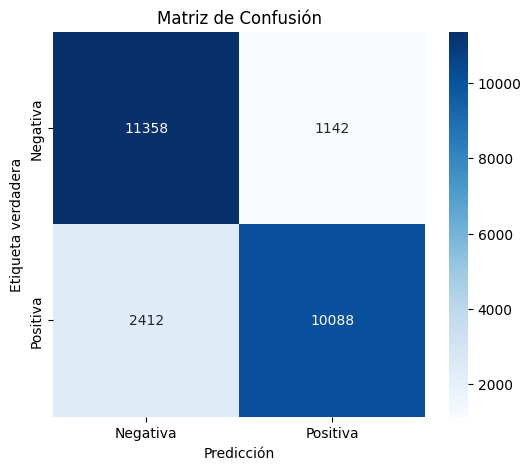

In [ ]:
# Predicciones (probabilidades)
y_pred_prob = transformer_model.predict([X_test_pad, X_test_pad])
# Convertir a clases (0 o 1)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Reporte de clasificaci√≥n
print("üìã Reporte de Clasificaci√≥n:\n")
print(classification_report(y_test, y_pred, target_names=["Negativa", "Positiva"]))

# Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred)

# Visualizaci√≥n
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negativa", "Positiva"], yticklabels=["Negativa", "Positiva"])
plt.xlabel("Predicci√≥n")
plt.ylabel("Etiqueta verdadera")
plt.title("Matriz de Confusi√≥n")
plt.show()

/tmp/ipython-input-32-2417583913.py:11: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


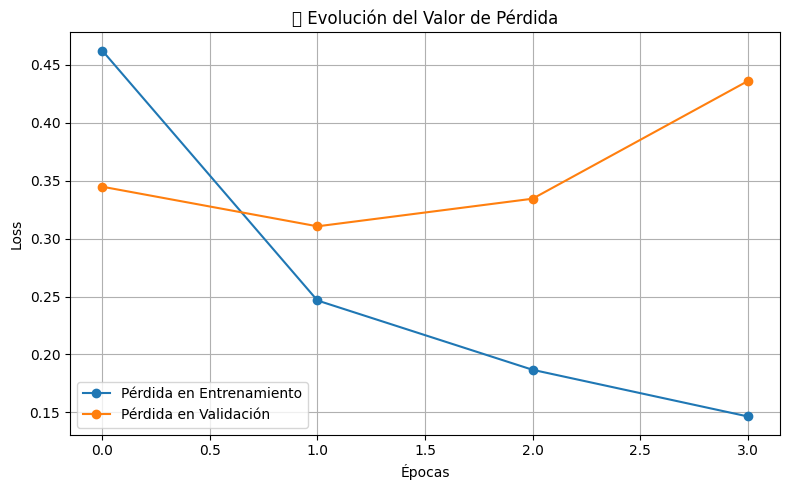

In [ ]:
# Gr√°fico del valor de p√©rdida durante el entrenamiento
def plot_loss(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='P√©rdida en Entrenamiento', marker='o')
    plt.plot(history.history['val_loss'], label='P√©rdida en Validaci√≥n', marker='o')
    plt.title('üìâ Evoluci√≥n del Valor de P√©rdida')
    plt.xlabel('√âpocas')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Llamamos a la funci√≥n
plot_loss(history)

In [ ]:
# Si est√°s en Google Colab, ejecuta esta celda para cargar el tablero de TensorBoard
%load_ext tensorboard
%tensorboard --logdir /content/drive/MyDrive/Transformer/Log

<IPython.core.display.Javascript object>

# Fase 7 predicciones

In [ ]:
# Reconstruye el modelo exactamente igual que durante el entrenamiento
# (con los bloques encoder, decoder, embeddings, pooling y dem√°s definidos)

transformer_model.load_weights("/content/drive/MyDrive/Transformer/Checkpoint/best_model.h5")
print("‚úÖ Modelo cargado correctamente.")

‚úÖ Modelo cargado correctamente.


In [ ]:
sample_reviews = [
    "This movie was a masterpiece with stunning visuals and strong performances",
    "Absolutely terrible. I can't believe I wasted two hours on this",
    "It was okay, not bad but not great either",
    "One of the best films I've seen in years!",
    "The plot made no sense and the acting was wooden",
    "I laughed, I cried, and I loved every minute of it",
    "Completely overrated. Don't understand the hype",
    "An emotional rollercoaster with brilliant writing",
    "Boring and predictable from start to finish",
    "This is a bad movie"
]

In [ ]:
# Cargar diccionario de palabras
word_index = imdb.get_word_index()
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["[PAD]"] = 0
word_index["[START]"] = 1
word_index["[UNK]"] = 2
word_index["[UNUSED]"] = 3

def encode_review(text, max_len=250):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    tokens = text.split()
    encoded = [1]  # [START]
    for word in tokens:
        encoded.append(word_index.get(word, 2))
    padded = pad_sequences([encoded], maxlen=max_len, padding='post', truncating='post')
    return padded

In [ ]:
print("üîç PREDICCIONES DETALLADAS DEL MODELO TRANSFORMER:\n")

for i, review in enumerate(sample_reviews):
    encoded = encode_review(review, max_len=250)
    prediction = transformer_model.predict([encoded, encoded])[0][0]
    predicted_class = int(prediction >= 0.5)

    predicted_sentiment = "Positiva ‚úÖ" if predicted_class == 1 else "Negativa ‚ùå"
    probability_percent = prediction * 100  # Convertimos a porcentaje

    print(f"{i+1}. Rese√±a: \"{review}\"\n")
    print(f"   üü© Predicci√≥n del modelo: {predicted_sentiment}")
    print(f"   üìä Probabilidad: {probability_percent:.2f}%\n")


üîç PREDICCIONES DETALLADAS DEL MODELO TRANSFORMER:

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 35ms/step
1. Rese√±a: "This movie was a masterpiece with stunning visuals and strong performances"

   üü© Predicci√≥n del modelo: Positiva ‚úÖ
   üìä Probabilidad: 99.95%

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 41ms/step
2. Rese√±a: "Absolutely terrible. I can't believe I wasted two hours on this"

   üü© Predicci√≥n del modelo: Negativa ‚ùå
   üìä Probabilidad: 0.26%

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 32ms/step
3. Rese√±a: "It was okay, not bad but not great either"

   üü© Predicci√≥n del modelo: Negativa ‚ùå
   üìä Probabilidad: 1.18%

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 32ms/step
4. Rese√±a: "One of the best films I've seen in years!"

   üü© Predicci√≥n del modelo: Positiva ‚úÖ
   üìä Probabilidad: 99.94%

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚